# Projeto #2 - Classificador supervisionado

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_2#instru%C3%A7%C3%B5es) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_2#crit%C3%A9rios-de-avalia%C3%A7%C3%A3o)


### 1) Qual a base escolhida?

# A base escolhida foi - eeg-eye-state (estado de olhos abertos/fechados) 

https://www.openml.org/d/1471

O objetivo do trabalho é classificar se os olhos das pessoas estão abertos ou fechado. As 14 features são medições das ondas cerebrais dos indivídios e através delas, deve-se prever se os olhos estão ou não fechados.

Especificamente, uma gravação eletroencefalográfica (EEG) foi feita de uma única pessoa por 117 segundos (pouco menos de dois minutos) enquanto o sujeito abria e fechava os olhos, que eram gravados por uma câmera de vídeo. O estado aberto / fechado foi então registrado em cada etapa do rastreamento EEG manualmente.

8.255 (55,12%) instâncias do corpus correspondem ao olho aberto e 6.722 (44,88%)instâncias ao olho fechado.


### 2) **(10%)** Pré-processamento: entendimento do conjunto de dados
- Quais são minhas features?
- Quais são minhas classes?
- Como estão distribuidas minhas classes?
- Checagem se os valores estão dentro de um limite permitido ou razoável.
- Tratamento de valores ausentes por eliminação ou substituição.
- Conversão do tipo de dados.


In [0]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

In [0]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt


In [3]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/projeto_2/olhosBD.csv")

In [0]:
print ("A base escolhida tem 15 features: ", df.columns)

In [0]:
print ("O target possui duas classes: ",df["Class"].unique())

As classes definem se os olhos estão abertos ou fechados, ou seja, '1' indica o estado de olho fechado e '0' o estado de olho aberto.
???????????????????????????????????????

In [0]:
print ("A base possui ", len(df), " registros")

In [0]:
print ('No de dimensões:',df.ndim)

In [0]:
# a base não possui valores nulos e nem ausentes
df.isnull().sum()

In [0]:
# Todas as features são numéricas
df.dtypes

In [0]:
# Há uma discrepância entre os valores minimos e máximos conforme observamos abaixo:
df.describe()

In [0]:
# obter os valores mais comuns do dataset
df.mode()

In [0]:
print ("V1: Max: ",max(df.V1)," Min: ",min(df.V1)," Dif:: ", max(df.V1) - min(df.V1))
print ("V2: Max: ",max(df.V2)," Min: ",min(df.V2)," Dif:: ", max(df.V2) - min(df.V2))
print ("V3: Max: ",max(df.V3)," Min: ",min(df.V3)," Dif:: ", max(df.V3) - min(df.V3))
print ("V4: Max: ",max(df.V4)," Min: ",min(df.V4)," Dif:: ", max(df.V4) - min(df.V4))
print ("V5: Max: ",max(df.V5)," Min: ",min(df.V5)," Dif:: ", max(df.V5) - min(df.V5))
print ("V6: Max: ",max(df.V6)," Min: ",min(df.V6)," Dif:: ", max(df.V6) - min(df.V6))
print ("V7: Max: ",max(df.V7)," Min: ",min(df.V7)," Dif:: ", max(df.V7) - min(df.V7))
print ("V8: Max: ",max(df.V8)," Min: ",min(df.V8)," Dif:: ", max(df.V8) - min(df.V8))
print ("V9: Max: ",max(df.V9)," Min: ",min(df.V9)," Dif:: ", max(df.V9) - min(df.V9))
print ("V10: Max: ",max(df.V10)," Min: ",min(df.V10)," Dif:: ", max(df.V10) - min(df.V10))
print ("V11: Max: ",max(df.V11)," Min: ",min(df.V11)," Dif:: ", max(df.V11) - min(df.V11))
print ("V12: Max: ",max(df.V12)," Min: ",min(df.V12)," Dif:: ", max(df.V12) - min(df.V12))
print ("V13: Max: ",max(df.V13)," Min: ",min(df.V13)," Dif:: ", max(df.V13) - min(df.V13))
print ("V14: Max: ",max(df.V14)," Min: ",min(df.V14)," Dif:: ", max(df.V14) - min(df.V14))



---
**REMOÇÃO DE OUTLIERS**


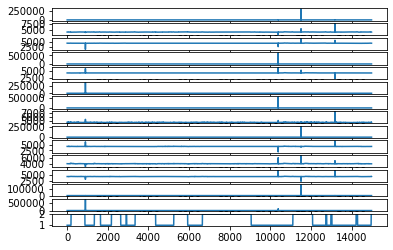

In [5]:
data = df
# recuperar dados como matriz numpy
values = data.values
# plotando os dados para avaliação
plt.figure()
for i in range(values.shape[1]):
	plt.subplot(values.shape[1], 1, i+1)
	plt.plot(values[:, i])
plt.show()

In [0]:
# detecção e remoção de outliers
from numpy import mean
from numpy import std
from numpy import delete
from numpy import savetxt

# step over each EEG column
for i in range(values.shape[1] - 1):
	# calculo da média de cada coluna e o desvio padrão
  data_mean, data_std = mean(values[:,i]), std(values[:,i]) 
	
  # define os limites do outlier
  cut_off = data_std * 4 
  lower, upper = data_mean - cut_off, data_mean + cut_off
	
  # remove os registros muito pequenos
  too_small = [j for j in range(values.shape[0]) if values[j,i] < lower]
  values = delete(values, too_small, 0)
  print('>deleted %d rows' % len(too_small))
	# remove os registros muito grandes
  too_large = [j for j in range(values.shape[0]) if values[j,i] > upper]
  values = delete(values, too_large, 0)
  print('>deleted %d rows' % len(too_large))
# salva os registros excluídos num arquivo
savetxt('/content/gdrive/My Drive/Colab Notebooks/projeto_2/olhos_sem_outliers.csv', values, delimiter=',')

In [7]:
print ("Registros excluídos:", len(df) - len(values), " / registros restantes: ", len(values))

Registros excluídos: 676  / registros restantes:  14304


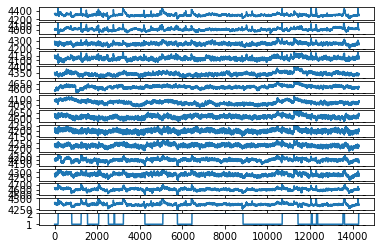

In [8]:
data2 = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/projeto_2/olhos_sem_outliers.csv", header=None)
# retrieve data as numpy array
values2 = data2.values
# create a subplot for each time series
plt.figure()
for i in range(values2.shape[1]):
	plt.subplot(values2.shape[1], 1, i+1)
	plt.plot(values2[:, i])
plt.show()

In [0]:
olhos.head(3)



---



In [0]:
# renomeando as colunas
cols = ('V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'Class')
data2.set_axis(cols, axis='columns', inplace=True)



---


**CLASSIFICADOR LINEAR **

In [16]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
X_train.iloc[:100, 0:1].shape

(100, 1)

In [28]:
y_train.iloc[:100, ].shape

(100,)

In [0]:

X = X_train.iloc[:100, 0:1]
y = y_train.iloc[:100, ]

In [0]:
# visualizando o resultado

plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title('Regressão Linear')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

In [29]:
#####Metricas#####
print(lin_reg.intercept_)
print(lin_reg.coef_)

1.914692140842355
[ 0.00161283 -0.00339028  0.00287085 -0.0028348   0.00668739 -0.00876255
  0.00032356  0.00083986  0.00078653  0.00030576 -0.00219434  0.00301252
  0.00017402  0.00064768]


In [33]:
y_pred = lin_reg.predict(X_train)
y_pred

array([0.95455997, 1.55857065, 1.35049214, ..., 1.33340322, 1.3899967 ,
       1.44685351])

In [34]:
############## Avaliacao do Modelo ##########
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('R2: ',r2_score(y_train, y_pred)) # ERRO
print('MSE: ',mean_squared_error(y_train, y_pred)) # "Desvio quadrado médio" sempre é não negativo, e valores mais próximos de zero são melhores.
print('RMSE: ',np.sqrt(mean_squared_error(y_train, y_pred)))

R2:  0.08182555001233915
MSE:  0.2273279229733106
RMSE:  0.4767891808475844


In [0]:
# visualizando o resultado
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title('Regressão Linear')
plt.xlabel('V1')
plt.ylabel('Classe')
plt.show()

In [0]:
#####Metricas#####
print(regressor.intercept_)
print(regressor.coef_)

0.7940261708510579
[ 1.92414375e-04 -3.88545755e-03  3.06353538e-03 -1.47098755e-03
  7.70971213e-03 -1.00485905e-02  1.35027855e-03  6.72008523e-04
  6.05453377e-05  1.99255834e-03 -2.34058769e-03  2.06183136e-03
 -5.19175144e-04  1.71438181e-03]


In [0]:
############## Avaliacao do Modelo ##########

print('R2: ',r2_score(y_train, y_pred)) # ERRO
print('MSE: ',mean_squared_error(y_train, y_pred)) # "Desvio quadrado médio" sempre é não negativo, e valores mais próximos de zero são melhores.
print('RMSE: ',np.sqrt(mean_squared_error(y_train, y_pred)))

R2:  0.08948070451782497
MSE:  0.2252407275683307
RMSE:  0.47459533032714374




---
**ARVORE DE DECISÃO**


In [0]:
# Usando o módulo tree para chamar o classificador de árvore de decisão
from sklearn import tree

In [47]:
# Ajuste Do tamanho máximo da árvore para 3:
tree.DecisionTreeClassifier(max_depth=3)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [48]:
# Ajuste Da quantidade mínima de elementos nas folhas para 4:
tree.DecisionTreeClassifier(min_samples_leaf=4)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [60]:
# Guardando a semente aleatória
RANDOM_STATE = 1

# vamos variar os parâmetros da DecisionTree implementada no sklearn, busque sua explicação detalhada na documentação
dec_clf = tree.DecisionTreeClassifier()

# Usando os arquivos de treino com as variáveis e o target, ajuste do modelo
dec_clf.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
#variables = df.columns
variables = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14']

In [97]:
print (X_train.iloc[:, 0:1].shape, y_train.shape, y.shape)

(10728, 1) (10728,) (100,)


In [0]:
X_train.iloc[:, 0:1]

In [0]:
y_train

In [0]:
######## Apresentação dos Dados e Modelo ########
plt.scatter(X_train.iloc[:, 0:1].shape, y_train, color ='b') 
plt.plot(X_train, y_pred, color ='k') 
  
plt.show() 

In [0]:
# plotando a árvore gerada pelo modelo 
import graphviz
dot_data = tree.export_graphviz(dec_clf, out_file=None, feature_names=variables, class_names=dec_clf.classes_, filled=True) 
graph = graphviz.Source(dot_data) 
graph



---
**PERCEPTRON**


In [0]:
class Perceptron(object):

    def __init__(self, taxa_aprendizado, n_features, pesos=None, epocas=5):
      self.taxa_aprendizado = taxa_aprendizado
      if pesos is None:
        self.pesos = np.random.uniform(-1, 1, n_features)
      self.epocas = epocas

    # x_train é um DataFrame com as features do conjunto de dados
    # y_train é um Series com os rótulos (label) do conjunto de dados
    def fit(self, X_train, y_train):

      for e in range(self.epocas):

        print("---------------------------")
        print("Epoca:", e)

        qtde_erros = 0

        n_linhas = X_train.shape[0]
        for n in range(n_linhas):
          
          print("\t---------------------------")
          print("\tAmostra:", n)

          np_x = X_train.iloc[n].values
          np_y = y_train.iloc[n]

          print("\tx_atual:", np_x)
          print("\tpesos:", self.pesos)

          output = np.dot(self.pesos, np_x)
          print("\toutput:", output)

          heaveside = 1 if output >= 0 else 0
          print("\theaveside:", heaveside)

          # houve erro
          if heaveside != np_y:

            qtde_erros += 1
            erro = np_y - heaveside
            print("\terro:", erro)
            
            self.pesos = self.pesos + (self.taxa_aprendizado * erro * np_x)
            print("\tpesos atualizado:", self.pesos)

          else:
            print("\tsem erros")
        if qtde_erros == 0:
          # encerra o looping da epoca
          break

    def predict(self, X_test):

      np_x = X_test.values

      prediction = []
      for x in np_x:
        if self.pesos.dot(x) >= 0:
          prediction.append(1)
        else: 
          prediction.append(0)

      return prediction

In [0]:
perceptron = Perceptron(taxa_aprendizado=0.5, n_features=X_train.shape)

In [0]:
X_train.iloc[:1000, 0:]

In [0]:
y_train.iloc[:1000,]

In [0]:
perceptron.fit(X_train.iloc[:1000, 0:], y_train.iloc[:1000,])
#perceptron.fit(X_train, y_train)

### 3) **(80%)** Nos blocos seguintes implemente seus classificadores (serão implementados 2 métodos diferentes).

Perceptron

#### 3.2) **(10%)** Baseline - Implemente seu classificador da forma mais simples possível para esse ser seu baseline

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.




---
**PERCEPTRON 2**


**Separação da feature alvo**

In [0]:
# Separando o target(os valores que serão previstos)
target_olhos_perc_1 = data2['Class']

# retirar a coluna Class do DataFrame
df_olhos_perc_1 = data2.drop(['Class'],axis=1)


SEPARAÇÃO DOS DADOS EM TREINO E TESTE

In [0]:
# importar train_test_split do sklearn para dividir dados de treino e teste
from sklearn.model_selection import train_test_split

In [0]:
# semente aleatória
RANDOM_STATE = 1

In [0]:
# o parâmetro test_size indica o percentual de amostras que serão selecionadas para teste

X_train_perc_1, X_test_perc_1, y_train_perc_1, y_test_perc_1 = train_test_split(df_olhos_perc_1, target_olhos_perc_1, 
                                                    test_size=0.25, # 25% será amostra de teste
                                                    random_state=RANDOM_STATE, stratify=target)

In [30]:
print('Dados: ', X_train_perc_1.shape,'Target:', y_train_perc_1.shape )

Dados:  (10728, 14) Target: (10728,)



---



In [35]:
from sklearn.linear_model import Perceptron

# perceptron = Perceptron(taxa_aprendizado=0.3, n_features=X_train_perc_1.shape[1])
clf = Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=15, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=1e-3,
           validation_fraction=0.3, verbose=0, warm_start=False)
clf.fit(X_train_perc_1, y_train_perc_1)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=15, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.3, verbose=0, warm_start=False)

In [36]:
Perceptron()

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
y_pred_perc_1 = clf.predict(X_train_perc_1)


In [38]:
acuracia = clf.score(X_train_perc, y_train_perc)
print("Acuracia de "+str(acuracia))
print("\n\n")

Acuracia de 0.6017897091722595





In [55]:
print(X_train_perc_1.shape , y_train_perc_1.shape)

(10728, 14) (10728,)


In [0]:
# ?????????????????????????????????????
Perceptron.fit (X_train_perc_1,y_train_perc_1,coef_init=None, intercept_init=None, sample_weight=None)

**COMPARAÇÃO DO TARGET REAL COM O PREVISTO**



In [0]:
from sklearn.metrics import classification_report

In [0]:
y_pred_perc_1 = clf.predict(X_train_perc_1)
y_true_perc_1 = y_train_perc_1

In [0]:
target_names = ['abertos','fechados']

In [43]:
print (y_true_perc_1.shape, y_pred_perc_1.shape)

(10728,) (10728,)


In [44]:
print(classification_report(y_true_perc_1, y_pred_perc_1, target_names=target_names))

              precision    recall  f1-score   support

     abertos       0.60      0.81      0.69      5891
    fechados       0.60      0.35      0.45      4837

    accuracy                           0.60     10728
   macro avg       0.60      0.58      0.57     10728
weighted avg       0.60      0.60      0.58     10728





---



Text(0, 0.5, 'target')

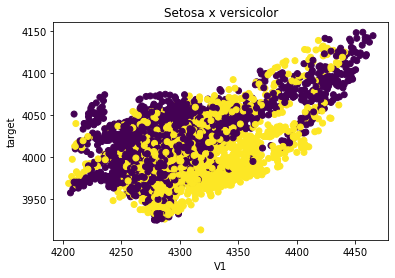

In [45]:
# PLOTANDO
plt.scatter(X_train_perc_1.V1,X_train_perc_1.V2,c=y_train_perc_1)
plt.title("Setosa x versicolor" )
plt.xlabel('V1')
plt.ylabel('target')

In [49]:
print (y_train_perc_1.shape, y_pred_perc_1.shape)

(10728,) (10728,)


In [50]:
# Visualizar os dados na matriz de confusão
from sklearn.metrics import confusion_matrix

# Compara o resultado do modelo com o resultado verdadeiro
cnf_matrix = confusion_matrix(y_train_perc_1, y_pred_perc_1)

# Constrói um Dataframe com a matriz de confusão apenas para ficar mais legível
pd.DataFrame(cnf_matrix, columns=('Prev ' + dec_clf.classes_), 
             index=('True ' + dec_clf.classes_))


NameError: ignored

Podemos plotar uma matriz mais interessante com a função abaixo usando o matplotlib.pyplot e a biblioteca itertools. Essa função utiliza muito da biblioteca matplotlib e o objetivo não é entendê-la, apenas usá-la para visualização no momento. O código foi disponibilizado originalmente na documentação da matriz de confusão no sklearn (link na célula acima).

In [0]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

<b>Usando a função declarada acima plotamos novamente a matriz de confusão</b>

Confusion matrix, without normalization


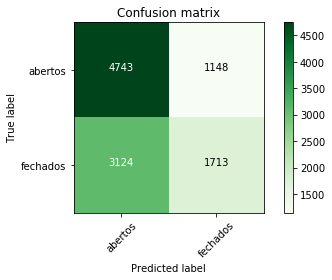

In [65]:
plot_confusion_matrix(cnf_matrix, target_names, normalize=False, 
                      title='Confusion matrix', cmap=plt.cm.Greens)

#### 3.3) **(20%)** Versão 1 - O que podemos fazer para melhorar nosso baseline? Aplique técnicas como redução de dimensionalidade, normalização ou outras. Compare os resultados.

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.



---

**NORMALIZANDO OS DADOS USANDO MIN/MAX**

In [0]:
# Os dados serão normalizados para visualizar se há melhora na execução do perceptron

In [69]:
data2.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,Class
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,1.0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,1.0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,1.0


In [78]:
cols=data2.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'Class'],
      dtype='object')

In [0]:
# o target será normalizado ficando 1 => 0 e 2 => 1
from sklearn import preprocessing

x = data2 #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalizado = pd.DataFrame(x_scaled)
df_normalizado

# renomeando as colunas
df_normalizado.set_axis(cols, axis='columns', inplace=True)

In [0]:
# target são os valores que serão previstos
target_normalizado = df_normalizado.Class

In [0]:
# retirar a coluna Class do DataFrame
df_normalizado = df_normalizado.drop(['Class'],axis=1)

In [82]:
# a base não possui valores nulos e nem ausentes
target_normalizado.unique()

array([0., 1.])

In [0]:
# renomeando as colunas
cols = ('V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14')
df_normalizado.set_axis(cols, axis='columns', inplace=True)

In [86]:
print (df_normalizado.shape, target_normalizado.shape)

(14304, 14) (14304,)



SEPARAÇÃO DOS DADOS EM TREINO E TESTE

In [0]:
# importar train_test_split do sklearn para dividir dados de treino e teste
from sklearn.model_selection import train_test_split

In [0]:
# semente aleatória
RANDOM_STATE = 1

In [0]:
# o parâmetro test_size indica o percentual de amostras que serão selecionadas para teste

X_train_normalizado, X_test_normalizado, y_train_normalizado, y_test_normalizado = train_test_split(df_normalizado, target_normalizado, 
                                                    test_size=0.25, # 25% será amostra de teste
                                                    random_state=RANDOM_STATE, stratify=target)

In [90]:
print('Dados: ', X_train_normalizado.shape,'Target:', y_train_normalizado.shape )

Dados:  (10728, 14) Target: (10728,)



---



In [0]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
X, y = load_digits(return_X_y=True)

In [92]:
# perceptron = Perceptron(taxa_aprendizado=0.3, n_features=X_train.shape[1])
clf = Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=15, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=1e-3,
           validation_fraction=0.3, verbose=0, warm_start=False)
clf.fit(X_train_normalizado, y_train_normalizado)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=15, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.3, verbose=0, warm_start=False)

In [93]:
Perceptron()

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [94]:
acuracia = clf.score(X_train_normalizado, y_train_normalizado)
print("Acuracia de "+str(acuracia))
print("\n\n")

Acuracia de 0.4581469052945563





#### 3.4) **(10%)** Tunning - Agora que temos um resultado promissor, vamos tentar melhorar o resultado alterando um ou mais hiper-parametro. Compare os resultados.

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

#### 3.5) Qual método escolhido?

O método foi o KNN

#### 3.6) **(10%)** Baseline - Implemente seu classificador da forma mais simples possível para esse ser seu baseline

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from numpy import mean
values = d.values
# evaluate knn using 10-fold cross-validation
scores = list()
kfold = KFold(10, shuffle=True, random_state=1)
for train_ix, test_ix in kfold.split(values):
	# define train/test X/y
	trainX, trainy = values[train_ix, :-1], values[train_ix, -1]
	testX, testy = values[test_ix, :-1], values[test_ix, -1]
	# define model
	model = KNeighborsClassifier(n_neighbors=3)
	# fit model on train set
	model.fit(trainX, trainy)
	# forecast test set
	yhat = model.predict(testX)
	# evaluate predictions
	score = accuracy_score(testy, yhat)
	# store
	scores.append(score)
	print('>%.3f' % score)
# calculate mean score across each run
print('Final Score: %.3f' % (mean(scores)))

#### 3.7) **(20%)** Versão 1 - O que podemos fazer para melhorar nosso baseline? Aplique técnicas como redução de dimensionalidade, normalização ou outras. Compare os resultados.

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

#### 3.8) **(10%)** Tunning - Agora que temos um resultado promissor, vamos tentar melhorar o resultado alterando um ou mais hiper-parametro. Compare os resultados.

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

### 5) **(10%)** Conclusões

*Compare seus resultados. Imaginando que sua solução fosse para produção, qual deles você escolheria? Por que? Quais os riscos você enxerga? O que recomendaria de próximos passos para melhorar os resultados?*